# Problem Statement

The objective of this task is to **detect hate speech in tweets**. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify `racist or sexist` tweets from other tweets.

Formally, given a training sample of tweets and labels, where `label ‘1’ denotes the tweet is racist/sexist` and `label ‘0’ denotes the tweet is not racist/sexist`, your objective is to predict the labels on the given test dataset.

In [3]:
# importing the libraries
import re # for regular expression
import nltk # for text manipulation
import string
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)

%matplotlib inline

In [4]:
# lets read the train and test data
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test_tweets.csv')
submission=pd.read_csv('/content/sample_submission.csv')

## Tweet Processing and Cleaning

Text is a highly unstructured form of data , vaious type of noise are pesent in it and the data is not really analyzable without preprocessing. The entire process of cleaning and standardization of text, making it noise free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:
1. Data inspection
2. Data cleaning

### Data Inspection

In [5]:
# Data inspection
# 1. Let's check out a few non racist / sexist tweets.
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [6]:
# 2. Let's check out a few racist / sexist tweets.
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


There are quite many words and characters which are not really required. So we will try to keep only those words which are important and add value.

In [7]:
# Lets check the dimension of the data
print(f'Num. of Rows in train data : {train.shape[0]}\nNum. of Cols in train data : {train.shape[1]}')

Num. of Rows in train data : 31962
Num. of Cols in train data : 3


In [8]:
print(f'Num. of Rows in test data : {test.shape[0]}\nNum. of Cols in train data : {test.shape[1]}')

Num. of Rows in test data : 17197
Num. of Cols in train data : 2


In [9]:
# checking the distribution of classes in train data
train['label'].value_counts(normalize=True)*100

,proportion
label,
0,92.98542
1,7.01458


**The classes are highly imbalance that means there are less number of racist/sexist tweets**

Now let's check the distribution of length of the tweets, in terms of words, in both train and test data.

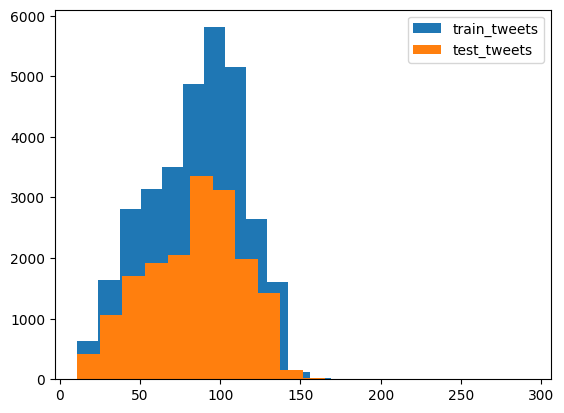

In [10]:
len_train=train['tweet'].str.len()
len_test=test['tweet'].str.len()
plt.hist(len_train,bins=20,label='train_tweets')
plt.hist(len_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

### Data Cleaning
Before we start cleaning the data lets combine train and test data. Combining the train and test datasets will makes us easier to preprocess the data. Later we will split it back into train and test data.

In [11]:
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(49159, 3)

In [12]:
# defining a function to remove the unwanted text patterns from the tweets.
def remove_pattern(input,pattern):
    r=re.findall(pattern,input)
    for i in r:
        input=re.sub(i,'',input)
    return input

**Removing twitter handles (@user)**\
Let's create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed '@[]*' as the pattern to remove_pattern function. It is actually a regular expression which will pick any word starting with '@'.

In [13]:
combined['tidy_tweet']=np.vectorize(remove_pattern)(combined['tweet'],'@[\\w]*')
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


**Removing Punctuations, Numbers, and Special Characters**\
Here we will replace everything except characters and hastags with hastags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabet and "#".

In [14]:
combined['tidy_tweet']=combined['tidy_tweet'].str.replace("[^a-zA-Z#]",' ',regex=True)
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


**Removing Short words**\
We have to be a little careful here in selecting the length of words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like "hmm" , "oh" are of very little use. It is better to get rid of them.

In [15]:
combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


**Text Normalization**\
Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are the individual terms or words and tokenization is the process of splitting a string of text into tokens.

In [16]:
tokenized_tweet=combined['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]"
1,"[thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]"
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


Now we can Normalize the tokenized tweets.

In [17]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Now let's stich these tokens back together. It can be easily done by nltk's MooseDetokenizer function.

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
    combined['tidy_tweet']=tokenized_tweet

In [19]:
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Story Generation and Visualization from Tweets

In [20]:
from wordcloud import WordCloud

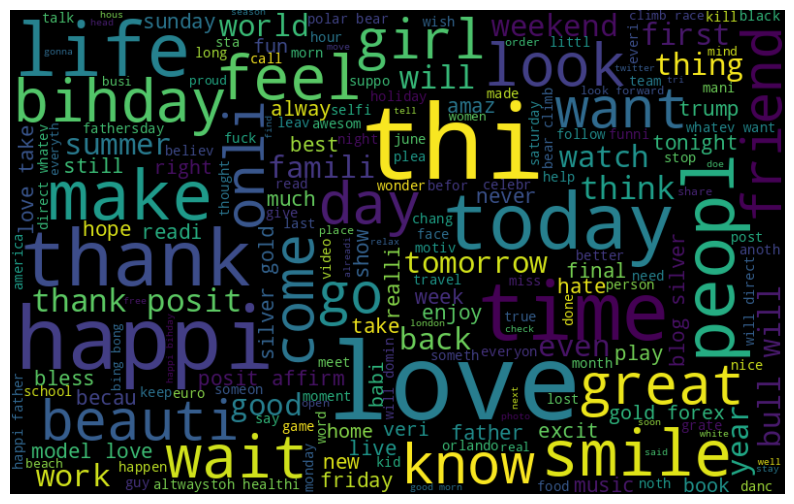

In [21]:
all_words=' '.join([i for i in combined['tidy_tweet']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**racist/sexist words in tweets**

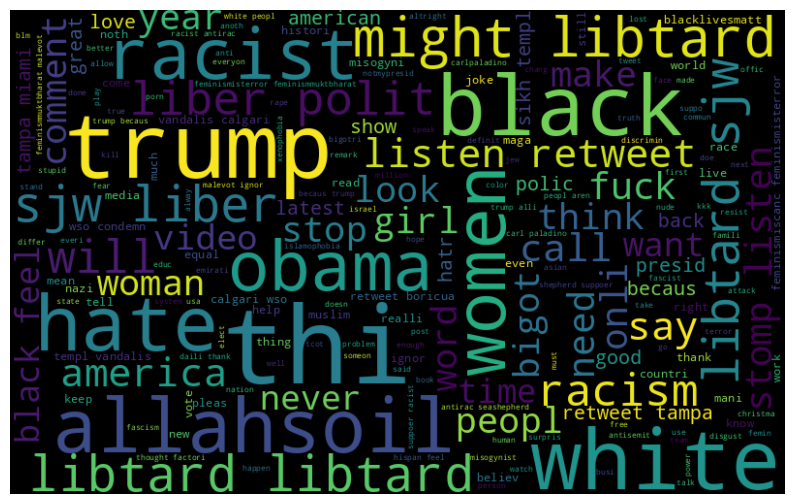

In [22]:
all_words=' '.join([i for i in combined['tidy_tweet'][combined['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**non racist/sexist words in tweets**

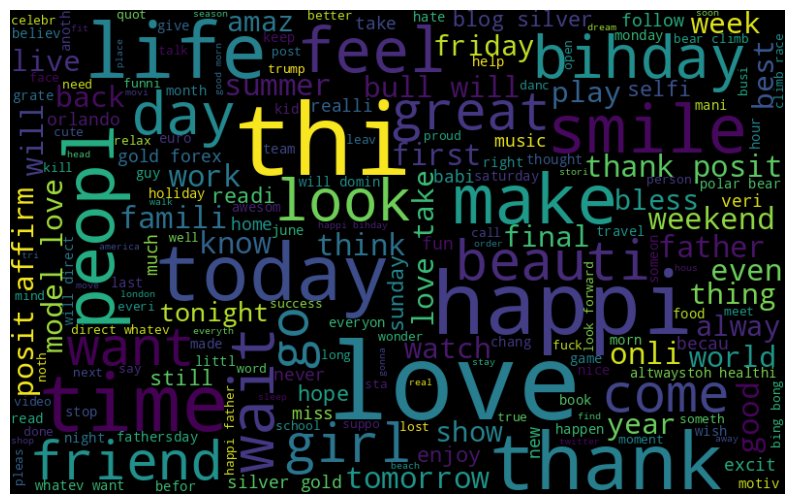

In [23]:
all_words=' '.join([i for i in combined['tidy_tweet'][combined['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# function to extract haastags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [25]:
# extracting the hastgs from non racist/sexist tweets
HT_regular=hashtag_extract(combined['tidy_tweet'][combined['label']==0])

In [26]:
# extracting the hastgs from non racist/sexist tweets
HT_negative=hashtag_extract(combined['tidy_tweet'][combined['label']==1])

In [27]:
# unsetting list
HT_regular=sum(HT_regular,[])
HT_negative=sum(HT_negative,[])

In [28]:
# non racist/sexist tweets
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})

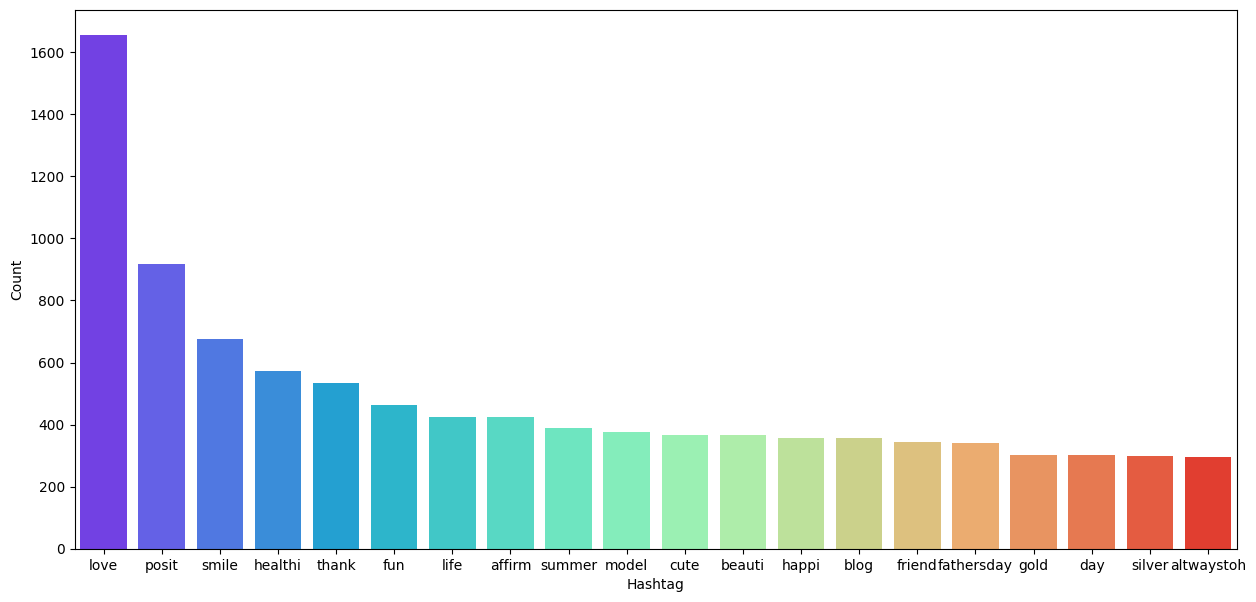

In [29]:
# selecting top 20 most frequent hashtags
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(15,7))
ax=sns.barplot(data=d,x='Hashtag',y='Count',hue='Hashtag',palette='rainbow')
ax.set(ylabel='Count')
plt.show()

In [30]:
# racist/sexist tweets
a=nltk.FreqDist(HT_negative)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})

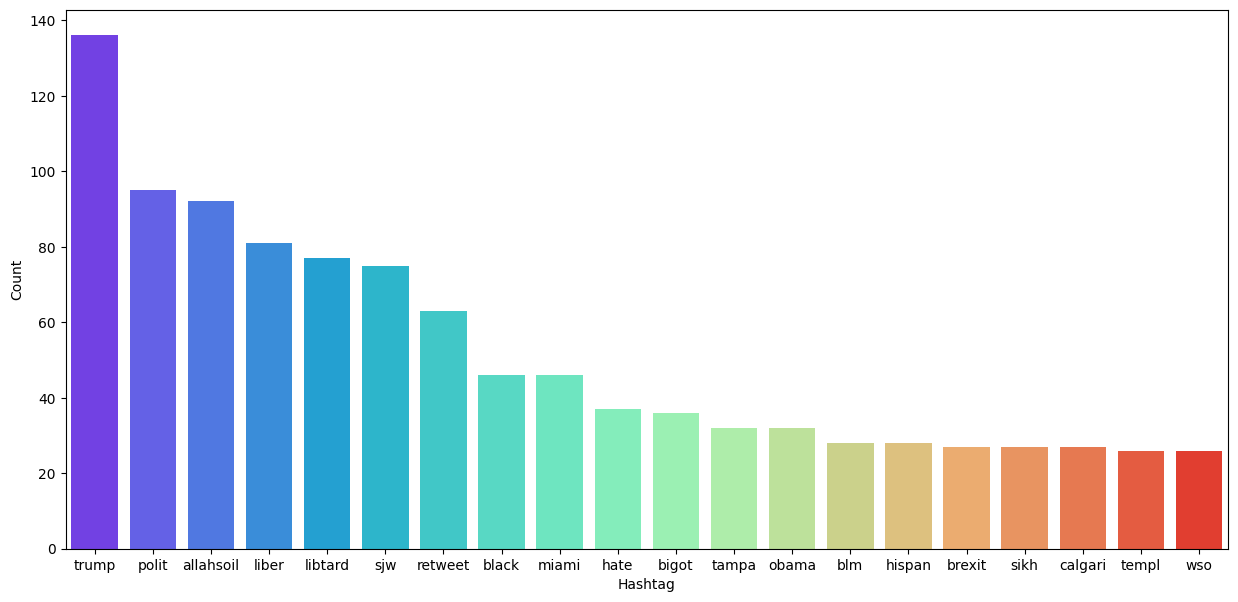

In [31]:
# selecting top 20 most frequent hashtags
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(15,7))
ax=sns.barplot(data=d,x='Hashtag',y='Count',hue='Hashtag',palette='rainbow')
ax.set(ylabel='Count')
plt.show()

## Extracting Features from Cleaned Tweets

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [33]:
bow_vertorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vertorizer.fit_transform(combined['tidy_tweet'])
bow.shape

(49159, 1000)

In [34]:
# lets train a word2vec model
tokenized_tweet=combined['tidy_tweet'].apply(lambda x: x.split())

In [35]:
# tokenizing
model_w2v=gensim.models.Word2Vec(tokenized_tweet,
                                 vector_size=200,# desired number of features/independent variables
                                 window=5,# context window size
                                 min_count=2,
                                 sg=1, # 1 for skip gram model
                                 hs=0,
                                 negative=10, # for negative sampling
                                 workers=2, # no. of cores
                                 seed=34)
model_w2v.train(tokenized_tweet,total_examples=len(combined['tidy_tweet']),epochs=20)


(6510808, 7536020)

Let's play a bit with our Word2Vec model and see hoe does it perform. we will specify a word and the model will pull out the most similar words from the corpus.

In [36]:
model_w2v.wv.most_similar(positive='dinner')

[('spaghetti', 0.5582630634307861),
 ('dess', 0.5482890605926514),
 ('#avocado', 0.5467354655265808),
 ('#biall', 0.538000226020813),
 ('#cellar', 0.5354906320571899),
 ('enrout', 0.5288556814193726),
 ('kayak', 0.524838924407959),
 ('burrito', 0.5246477127075195),
 ('melani', 0.5213290452957153),
 ('cookout', 0.5189566016197205)]

In [37]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5771449208259583),
 ('#delegaterevolt', 0.5433580279350281),
 ('phoni', 0.5404828786849976),
 ('endors', 0.5249185562133789),
 ('potu', 0.5218876600265503),
 ('hillari', 0.5213168859481812),
 ('chopra', 0.5129726529121399),
 ('tomlin', 0.511533796787262),
 ('presumpt', 0.5077464580535889),
 ('unfavor', 0.5066177248954773)]

In [38]:
# lets check the vector representation of any word from our corpus
model_w2v.wv['food']

array([ 4.81003404e-01, -4.87235397e-01,  3.21863562e-01, -5.14740229e-01,
       -7.42637590e-02, -1.37742572e-02, -1.20900489e-01, -7.50061989e-01,
       -7.58030117e-01, -1.41762519e+00,  3.16416651e-01, -2.89084643e-01,
       -5.27095139e-01,  2.55128723e-02, -7.45441467e-02, -1.16585478e-01,
        4.38902318e-01, -2.43756309e-01, -9.14357677e-02, -4.97964501e-01,
       -2.38121927e-01,  8.77061427e-01,  1.43320158e-01,  5.41464567e-01,
        2.49452934e-01, -3.28808427e-01, -2.98428178e-01, -1.68671340e-01,
        4.66279477e-01,  3.73761624e-01,  4.22625661e-01, -9.85910475e-01,
       -3.98375615e-02, -2.75846452e-01,  1.87351078e-01, -3.63131613e-02,
       -3.99196595e-02,  1.70161501e-01,  4.86217976e-01, -1.01143503e+00,
       -4.32366997e-01,  3.85000318e-01, -6.10252380e-01, -8.06480497e-02,
       -1.78890973e-01, -2.11553089e-02,  1.07397355e-01,  1.74443677e-01,
       -1.38523209e+00, -1.84518039e-01, -3.79300006e-02, -1.07933342e+00,
       -9.00559186e-04,  

In [39]:
len(model_w2v.wv['food'])

200

In [40]:
from itertools import count
# defining a function to vectorize the tweets
def word_vec(tokens,size):
  vec=np.zeros(size).reshape((1,size))
  count=0
  for i in tokens :
    try :
      vec+=model_w2v.wv[i].reshape((1,size))
      count+=1
    except KeyError: # handling the case where the token is not in the vocabulary
      continue
  if count!=0:
      vec/=count
  return vec

In [41]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet),200):
  wordvec_arrays[i,:]=word_vec(tokenized_tweet[i],200)
wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

#### Bag of Words

#### TF-IDF

#### Word Embeddings

## Model Building: Sentiment Analysis

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [43]:
train_bow=bow[:31962,:]
test_bow=bow[:31962,:]

In [44]:
# extracting train and test and validation set
x_train,x_val,y_train,y_val=train_test_split(train_bow,train['label'],random_state=42,train_size=0.7)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((22373, 1000), (9589, 1000), (22373,), (9589,))

#### Logistic Regression

In [45]:
logreg=LogisticRegression()
# training the model
logreg.fit(x_train,y_train)
y_preds=logreg.predict_proba(x_val)[:,1]
# predicting in the validation set
y_predh=(y_preds>0.3).astype(int)
f1_score(y_val,y_predh)

0.5332225913621262

In [46]:
submission['label']=pd.Series(y_predh)

In [47]:
submission.to_csv('/sample_submission.csv',index=False)

In [48]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier

In [49]:
xgb=XGBClassifier()
# training the model
xgb.fit(x_train,y_train)
y_preds=xgb.predict_proba(x_val)[:,1]
# predicting in the validation set
y_predh=(y_preds>0.3).astype(int)
f1_score(y_val,y_predh)

0.5301204819277109

In [50]:
rf=RandomForestClassifier()
# training the model
rf.fit(x_train,y_train)
y_preds=rf.predict_proba(x_val)[:,1]
# predicting in the validation set
y_predh=(y_preds>0.3).astype(int)
f1_score(y_val,y_predh)

0.5122646891043925

In [51]:
ada=AdaBoostClassifier()
# training the model
ada.fit(x_train,y_train)
y_preds=logreg.predict_proba(x_val)[:,1]
# predicting in the validation set
y_predh=(y_preds>0.3).astype(int)
f1_score(y_val,y_predh)

0.5332225913621262